In [4]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 20s 1us/step


In [7]:
train_data.shape

(25000,)

In [10]:
train_labels.shape

(25000,)

In [11]:
max([max(sequence) for sequence in train_data])

9999

In [13]:
word_index = imdb.get_word_index() 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [14]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [16]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [19]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
# model definition
from keras import models 
from keras import layers 

model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
# compile model 
from keras import optimizers
from keras import losses 
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [26]:
# validating 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [50]:
# train model 
history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.2954 - binary_accuracy: 0.9053 - val_loss: 0.3046 - val_binary_accuracy: 0.8839
Epoch 2/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2150 - binary_accuracy: 0.9308 - val_loss: 0.2884 - val_binary_accuracy: 0.8845
Epoch 3/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1710 - binary_accuracy: 0.9437 - val_loss: 0.3670 - val_binary_accuracy: 0.8519
Epoch 4/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1413 - binary_accuracy: 0.9536 - val_loss: 0.2932 - val_binary_accuracy: 0.8829
Epoch 5/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1165 - binary_accuracy: 0.9632 - val_loss: 0.3290 - val_binary_accuracy: 0.8763
Epoch 6/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0938 - binary_accuracy: 0.9723 - val_loss: 0.3257 - val_bi

In [51]:
history_dict = history.history

In [52]:
history_dict.keys()

dict_keys(['binary_accuracy', 'val_loss', 'loss', 'val_binary_accuracy'])

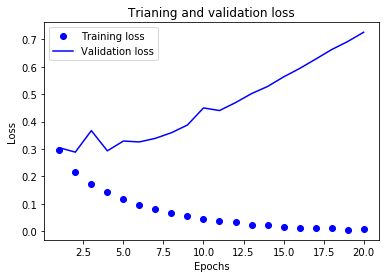

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline  

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']

epochs = range(1, len(loss_values) + 1)
val_loss_values

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Trianing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#